# Историческая справка о нейронных сетях

## Литература

1. [Нейронные сети - wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C)
2. [Искусственный нейрон - wiki](https://clck.ru/34bUJw)
3. [Модель МакКаллока-Питтса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%9C%D0%B0%D0%BA%D0%9A%D0%B0%D0%BB%D0%BB%D0%BE%D0%BA%D0%B0-%D0%9F%D0%B8%D1%82%D1%82%D1%81%D0%B0)
4. "Глубокое обучение. Погружение в мир нейронных сетей" - Николенко, Кадурин, Архангельская
5. Специализация "Машинное обучение и анализ данных" от МФТИ и Яндекса на Coursera
6. ["Нейронные сети и компьютерное зрение" - Samsung Russia Open Education](https://stepik.org/course/50352/info)
7. [Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)
8. [К. В. Воронцов - Лекции по искусственным нейронным сетям](http://www.machinelearning.ru/wiki/images/c/cc/voron-ml-neuralnets.pdf)

## Наиболее ранние работы

**Нейронная сеть** — математическая модель, предназначенная для решения различных задач машинного обучения. Изначально концепция нейронных сетей была "подсмотрена" у нервных клеток живого организма - биологических нейронов, обычно состоящих из одного ядра, нескольких дендритов (входов) и аксонона (выхода). Связи между биологическими нейронами называют синопсами. Один нейрон, будучи соединенным с огромным количеством других нейронов, может передавать им бинарные сигналы, говорящие о том, что он или активен, или "выключен".

Следуя этой концепции, первые модели искуственного нейрона могли работать только с бинарными логическими сигналами. В наиболее ранних математических моделях искусственный нейрон получает на вход линейную комбинацию всех входных сигналов с некоторыми весами и делает над ней некоторое (как правило) нелинейное преобразование при помощи функции активации. Полученный результат посылается на единственный выход.

У биологических нейронов нет весов в том же смысле, что они есть у искуственных нейронов. Также в процессе развития концепции искуственных нейронных сетей ученые быстро перешли к тому, чтобы подавать на вход непрерывные (аналоговые) сигналы. А еще биологические нейроны не имеют двунаправленных связей, не могут реализовывать механизм обратного распространения ошибки. Поэтому, хотя и искуственные нейроны были вдохновлены концепцией биологического нейрона, между этими понятиями нельзя ставить знак равенства.

Началось же все с уже знакомых линейных моделей: 
* Дано $N$ объектов: $|X| = N$
* Объекты описаны векторами вещественных чисел: $x_i = (x_1, x_2, ..., x_d) \in R^d$
* $w_0, w_1, ..., w_d \in R$ - искомые веса модели (решаем задачу оптимизации)
* $f(x, w) = w_0 + x_1 w_1 + ... + x_n w_n = w_0 + \sum_{j=1}^{d} w_j x_j$
* Добавляем фиктивную размерность $x_{i,0} = 1$ для каждого объекта и получаем линейную комбинацию: $\sum_{j = 0}^{d} w_j x_j = \vec{w}^T \vec{x} = \langle w, x \rangle$

А дальше?

### Нейрон МакКаллока-Питтса (1943)

Нейрон МакКаллока-Питтса - математическая модель, называемая TLU (Threshold Logic Unit) или Linear Threshold Unit.

Является линейной комбинацией признаков с весами, за которой идет нелинейная функция активации, сравнивающая скалярное произведение с неким порогом (пороговая функциия активации - ступенчатая функция Хевисайда):

$$a(x, w)={\begin{cases}1,&\varphi(\langle w, x \rangle) > \theta;\\0,& \text{otherwise}\end{cases}}$$

Следует концепции биологического нейрона, так как на выходе имеет 2 дискретных состояния. Также из ячеек TLU можно легко собрать ацикличный граф (но об этом немного позже).

### Линейный однослойный перцептрон Розенблата (1958)

Перцептрон Розенблата - это также искуственный нейрон, **линейная модель бинарной классификации** ($y(x) \in \{-1, 1\}$), которая строит гиперплоскость, разделяющую пространство входов на 2 части, и решение о присвоения метки класса объекту будет приниматься на основе линейной функции от входящих признаков.

$$a(x, w) = \text{sign}(\langle w, x \rangle) = {\begin{cases}1,& \langle w, x \rangle > 0;\\-1,& \langle w, x \rangle \leq 0;\end{cases}}$$

Будем решать задачу оптимизации при помощи градиентного спуска: искать $w_j$. Функция ошибки в перцептроне Розенблата - количество неверно классифицированных объектов:

$$Q(w) = - \sum_{x \in X_{\text{incorrect}}} y(x)\langle w, x \rangle$$

Таким образом, мы минимизируем именно количество неверных ответов, но никак не награждаем модель за верные. При умножении на $y(x)$ знак произведения всегда будет отрицательным. Полученная функция является кусочно-линейной, дифференцируемой почти везде.

Таким образом, мы можем использовать алгоритм градиентного спуска. На шаге $t$ обучения для $i$-го элемента $x_i \in X$ мы получаем:

$$w^t = w^{t-1} - \eta \nabla Q(w^{t-1}) = w^{t-1} + \eta (y_i - a_i^{t-1}(x_i, w^{t-1}))x_i$$

Важно отметить, что в геометрическом смысле наш линейный классификатор строит **разделяющую гиперплоскость**: $\langle w, x \rangle = 0$. В N-мерном пространстве - это пространство размерности (N-1), которое проходит там, где функция активации меняет свое значение. То есть для пороговой функции активации - это место, где аргумент функции активации равен нулю.

Смотри: [Геометрия машинного обучения. Разделяющие гиперплоскости или в чём геометрический смысл линейной комбинации?](https://habr.com/ru/articles/324736/)

## Формализуем понятие искусственного нейрона

Искусственный нейрон - потомок представленных выше концепций. С течением времени были изобретены другие функции активации, и мы можем определить искусственный нейрон, опираясь не на конкретную функцию активации, а на какую-нибудь абстрактную:

$$a(x, w) = \varphi(\sum\limits_{j=0}^d w_j x_j) = \varphi(w^Tx) = \varphi(\langle w, x \rangle)$$

Функция активации должна отвечать нескольким критериям:
* Она ограничена
* Она непрерывна
* Она монотонна
* Она везде дифференцируема (но не всегда)

<img src="pictures/neuron.jpg" width=600 height=600 />

Хорошая функция активации должна быть нелинейной (почему, поговорим чуть ниже). Каноничный пример здесь - сигмоидная функция активации:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

С ее помощью мы можем реализовать нашу любимую логистическую регрессию. Тогда уже знакомый нам функционал ошибки:

$$Q(w) = -\frac{1}{N} \sum_{i=1}^N (y_i \log{(\sigma(w^T x_i))} + (1-y_i)\log{(1 - \sigma(w^T x_i))})$$

## XOR problem

Теорема о сходимости (1962): Линейный перцептрон может классифицировать любые **линейно разделимые** входные данные.

К сожалению, нам этого мало. Одно из самых известных ограничений линейных моделей - проблема XOR: при помощи одного линейного однослойного перцептрона нельзя реализовать фунцию XOR, так множество ее нулей и множество ее единиц линейно неразделимы. А комбинация линейных функций также является линейной функцией.

Линейный перцептрон может вычислять функции алгебры логики x1 OR x2, x1 AND x2, NOT(x1 AND x2). Покажем соответствующие веса для decision boundary (смотри рисунок):
* x1 OR x2 = [x1 + x2 - 1/2 > 0] => w1 = w2 = 1, w0 = -1/2
* x1 AND x2 = [x1 + x2 - 3/2 > 0]  => w1 = w2 = 1, w0 = -3/2
* NOT(x1 AND x2) = [-x1 - x2 + 3/2 < 0] => w1 = w2 = -1, w0 = 3/2

Однако, в случае с функцией XOR мы столкнемся с линейной неразделимостью:
* x1 XOR x2 = [(x1 OR x2) - (x1 AND x2) - 1/2 > 0]

<img src="pictures/xor_problem.png" width=600 height=600 />

И что же делать? Добавить еще один слой: полносвязная нейронная сеть с одним скрытым слоем и пороговой функцией активации может точно вычислять функиию x1 XOR x2. А вообще, по теореме Колмогорова-Арнольда любая нейронная сеть с одним скрытым слоем из $2d+1$ нейронов может точно вычислять произвольные непрерывные функции:

**Теорема (1957)**: Каждая непрерывная функция a(x), заданная на единичном кубе d-мерного пространства, представима в виде:

$$a(x) = \sum\limits_{k=1}^{2d+1} \sigma_k(\sum\limits_{i=1}^{d} h_{ki} (x_i)),$$

где функции $\sigma_k$ и $h_{ki}$ являются непрерывными и $h_{ki}$ не зависит от выбора $a$.

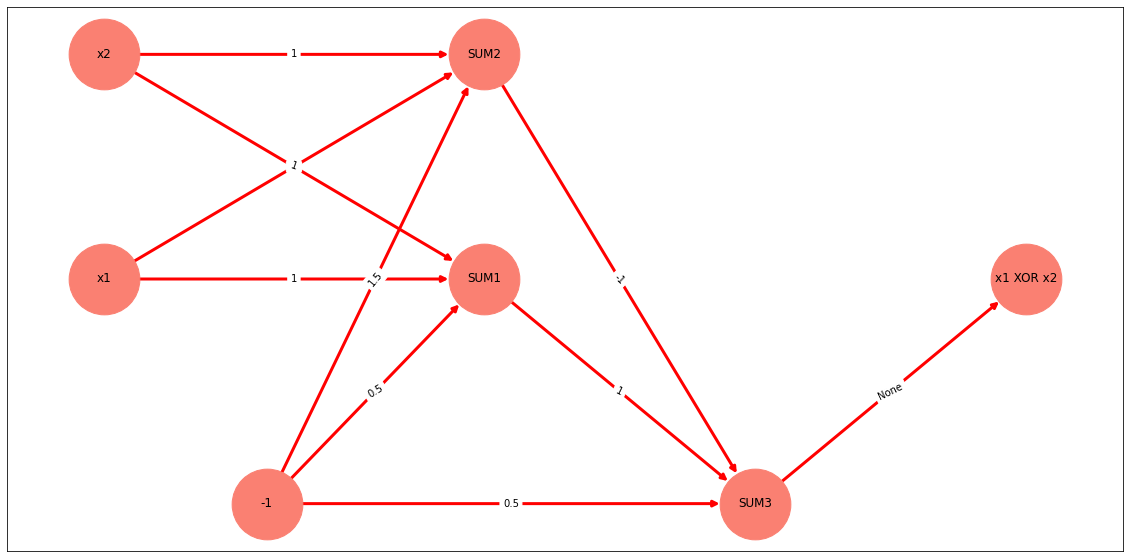

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(
    [
        ("x1","SUM1"),("x1","SUM2"),("x2","SUM1"),
        ("x2","SUM2"), ("SUM1","SUM3")
    ], weight=1
)
G.add_edges_from([("-1","SUM1"),("-1","SUM3")], weight=0.5)
G.add_edges_from([("-1","SUM2"),], weight=1.5)
G.add_edges_from([("SUM2","SUM3"),], weight=-1)
G.add_edges_from([("SUM3","x1 XOR x2"),], weight=None)

plt.figure(figsize=(20,10))

fixed_positions = {
    "-1": (3, 0), "x1": (0, 5), "x2": (0, 10),
    "SUM1": (7, 5), "SUM2": (7, 10), "SUM3": (12, 0),
    "x1 XOR x2": (17, 5),
}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)

options = {
    'node_color': 'salmon',
    'node_size': 5000,
    'width': 3,
    'arrowsize': 12,
}

nx.draw_networkx_nodes(G, pos, **options)
nx.draw_networkx_labels(G, pos, **options)
edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True, **options)

plt.show()

## Многослойные нейронные сети

По сути, это ацикличные направленные графы вычислений, где в узле лежит искусственный нейрон. В многослойных сетях прямого распространения выделяют несколько типов нейронов:
* входные
* выходные
* скрытые

Нейроны одного типа объединяются в слой:
* Сперва вектов входов $x_i = (x_1, x_2, ..., x_d) \in R^d$ подается в несколько входных нейронов, у каждого из которых свои собственные веса;
* Выходы нейронов входного слоя - новый вектор входов для нейронов второго (скрытого или выходного) слоя;
* И так далее.

Допустим, мы хотим реализовать **двуслойную нейронную сеть** из $D$ искусственных нейронов:

$$a(x, w) = \sigma^{(2)}(\sum\limits_{i=1}^D w_i^{(2)} \cdot \sigma^{(1)} (\sum\limits_{j=1}^d w_{ij}^{(1)} x_j + w_0^{(1)}) + w_0^{(2)})$$

Тогда веса модели имеют вид:
* $w^{(1)} = [w_0^{(1)}, w_1^{(1)}, ..., w_d^{(1)}]^T \in R^{(d+1) \times D}$
    * $w_i^{(1)} = [w_{0i}^{(1)}, w_{1i}^{(1)}, ..., w_{di}^{(1)}]^T \in R^{d+1}$
* $w^{(2)} = [w_{0}^{(1)}, w_{1}^{(1)}, ..., w_{D}^{(1)}]^T \in R^{D+1}$

Картинка из лекции К.В. Воронцова:

<img src="pictures/multiperc.png" width=600 height=600 />

### Компоненты нейронной сети:

* Архитектура нейронной сети (связи, функция активации и т.д.)
* Функция потерь
* Метод оптимизации
* Метрики качества

## История развития направления

["Deep Learning in Neural Networks: An Overview" - Juergen Schmidhuber](https://arxiv.org/abs/1404.7828)

| Год | Событие |
| --- | --- |
| 1943 | Нейрон МакКаллока-Питтса |
| 1949 | The Organization of Behaviour - Дональд Хебб. <br />Попытка объяснить, как происходит обучение нейронов головного мозга (нейробиология). <br />Широко известны правила Хебба, смысл которых можно свести к мысли о том, что связь между нейронами крепнет, если они часто взаимодействуют друг с другом. |
| 1951 | Модель SNARC (Stochastic Neural Analog Reinforcement Calculator) - Марвин Мински и Дин Эдмунд. <br />Сеть из сорока синопсов, которые были случайным образом соединены друг с другом и обучались по правилам Хебба. |
| 1958 | Линейный однослойный перцептрон Розенблата |
| 1960 | ADALINE - Widrow and Hoff. <br />Модель адаптивного линейного элемента, частный случай стохастического градиентного спуска. |
| **1970 - 1980** | **Первая зима ИИ** |
| 1971 | Метод группового учёта аргументов. <br />Метод, который был использован советским математиком, для обучения восьмислойной нейронной сети. |
| 1975 | Модель нейрона - блок линейной ректификации - Fukushima |
| 1980 | Неокогнитрон (вид CNN) - Fukushima |
| 1985 | Машины Больцмана - Джеффри Хинтоном и Терри Сейновски |
| **1990 - 2000** | **Вторая зима ИИ** |
| 1997 | LSTM -  Зепп Хохрайтер и Юрген Шмидхубер |
| 1998 | LeNet (CNN) для распознавания символов - Ян Лекун |
| 2003 | Neural Language Modeling - Йошуа Бенжио |
| 2012 | AlexNet побеждает на ImageNet |
| 2014 | Seq2Seq, VAE, GAN - Ян Гудфеллоу |
| 2015 | ResNet |
| 2016 | DeepMind - Alphago |
| 2018 | BERT |
| 2019 | GLUE benchmark (нейронные сети VS человек) |